<a href="https://colab.research.google.com/github/AkashBudholia/Data-Science/blob/master/Outlier_detection_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving baldwin_pump_data.csv to baldwin_pump_data.csv


In [ ]:
import pandas as pd   #for Dataframe manipulation
import io             # for byte stream.
import numpy as np   # for data manipulation
import matplotlib.pyplot as plt  # for data plotting(scatter plot, boxplots)
import seaborn as sns            # for data plotting(scatter plot, boxplots)
from keras.models import Sequential  # for CNN based layers
from keras.layers import LSTM    
from keras.layers import Dense

In [ ]:
dataset = pd.read_csv('baldwin_pump_data.csv')
dataset = dataset.dropna(how = 'all', axis = 0)   # dropping the lines between the tuples

std = dataset.std(skipna= True) # calclate the std deviation


Reset the Indexes

In [ ]:
index = []
for i in range(0,len(dataset)):
  index.append(i)
dataset.index = index

spare_df = dataset


Calculating the Median Absolute Deviation which is prone to ouliers as compared to mean and std deviation

Dataframe for Scatter Plot and BoxPlot

In [ ]:
dataset1scatter = pd.DataFrame(columns = {'Timestamp','BFP_SEAL_WATER_FLOW'})

testscatter = pd.DataFrame(columns = {'Timestamp','BFP_SEAL_WATER_FLOW'})

index = []
for i in range(0,len(dataset)):
  index.append(i)
dataset.index = index

dataset1scatter['BFP_SEAL_WATER_FLOW'] = dataset['BFP_SEAL_WATER_FLOW']

dataset1scatter['Timestamp'] = dataset['Timestamp']

dataset1scatter['BFP_SEAL_WATER_FLOW'].mask(dataset1scatter['BFP_SEAL_WATER_FLOW'].eq('None')).dropna(inplace = True) # dropping NaN and None values

mean = dataset1scatter['BFP_SEAL_WATER_FLOW'].mean()

dataset1scatter.dropna(inplace = True)


In [ ]:
from scipy.stats import median_absolute_deviation

mad = median_absolute_deviation(dataset1scatter['BFP_SEAL_WATER_FLOW'])

In [ ]:
L1 = []

index = []
for i in range(0,len(dataset1scatter)):
  index.append(i)
dataset1scatter.index = index

#using the fact that a value differing from the MAD, must be around the shutting down stage 

for row in range(len(dataset1scatter)):

    if dataset1scatter['BFP_SEAL_WATER_FLOW'][row] <= mad:
       L1.append(row)

dataset1scatter.drop(L1, axis = 0, inplace = True)

Setting the Boxplot ranges. IQR and box plots.

1.622917020978596


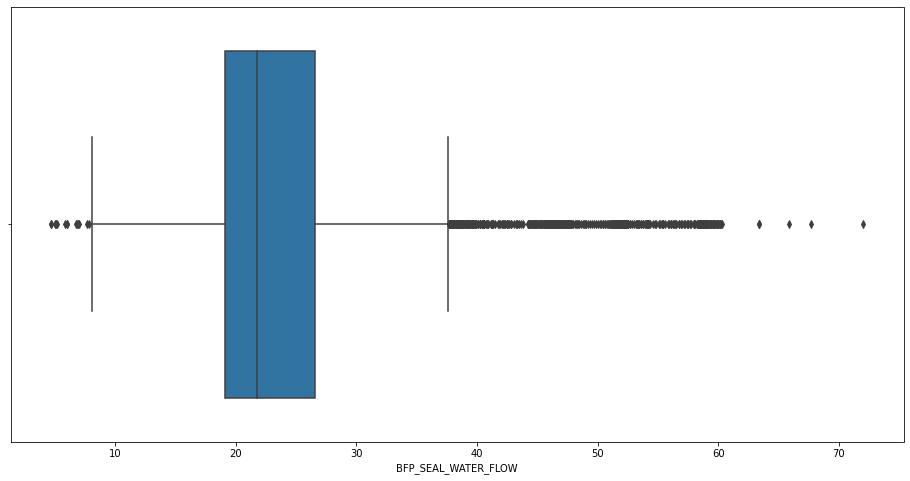

In [ ]:
plt.figure(figsize=(16,8))

bp = sns.boxplot(dataset1scatter['BFP_SEAL_WATER_FLOW'])

Q1 = dataset1scatter['BFP_SEAL_WATER_FLOW'].quantile(0.25)
Q3 = dataset1scatter['BFP_SEAL_WATER_FLOW'].quantile(0.75)
IQR = Q3 - Q1

print(dataset1scatter['BFP_SEAL_WATER_FLOW'].skew())



Increasing the cap to accomodate more data points as non outliers

In [ ]:
upper_cap = dataset1scatter['BFP_SEAL_WATER_FLOW'].quantile(0.9)
lower_cap = dataset1scatter['BFP_SEAL_WATER_FLOW'].quantile(0.1)

In [ ]:
dataset1scatter['BFP_SEAL_WATER_FLOW'] = np.where(dataset1scatter["BFP_SEAL_WATER_FLOW"] < lower_cap, lower_cap,dataset1scatter['BFP_SEAL_WATER_FLOW'])

dataset1scatter['BFP_SEAL_WATER_FLOW'] = np.where(dataset1scatter['BFP_SEAL_WATER_FLOW'] > upper_cap, upper_cap, dataset1scatter["BFP_SEAL_WATER_FLOW"])


print(dobj["BFP_SEAL_WATER_FLOW"].skew())

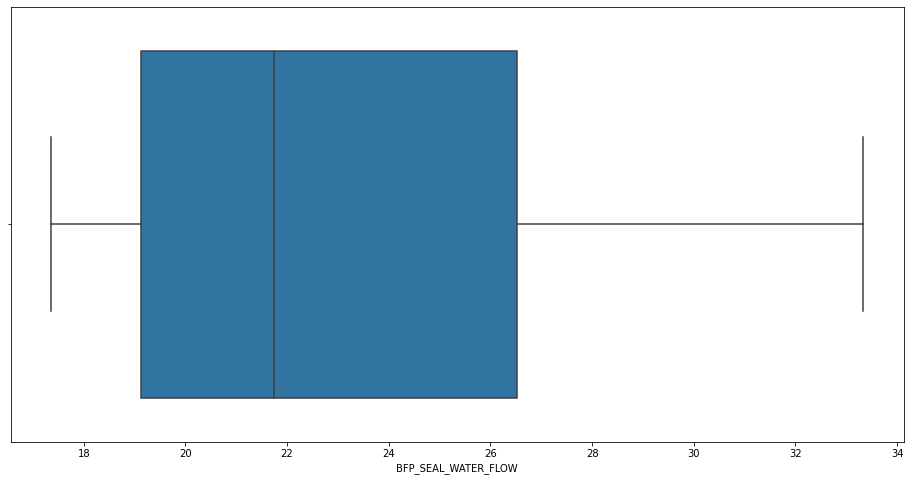

In [ ]:
plt.figure(figsize = (16,8))

bp = sns.boxplot(dataset1scatter['BFP_SEAL_WATER_FLOW'])

Setting up the timestamp as the index for scatterplots

In [ ]:
index = []
for i in range(0,len(dataset1scatter)):
  index.append(i)
dataset1scatter.index = index

timestamp = []
for i in range(0 , len(dataset1scatter)):
  temp = dataset1scatter['Timestamp'][i].split("/")
  month = temp[0]
  date = temp[1]
  year = temp[2].split(" ")[0]
  time = temp[2].split(" ")[1]
  sample = "19"+year + "-" + month + "-" + date +  " " + time
  sample = pd.to_datetime(sample , format="%Y-%m-%d %H:%M:%S")
  timestamp.append(sample)

dataset1scatter['Timestamp'] = timestamp

dataset1scatter.index = dataset1scatter['Timestamp']

dataset1scatter.sort_index(ascending = True, axis = 0, inplace = True)


In [ ]:
dataset1scatter.drop(['Timestamp'] , axis = 'columns' , inplace = True)

In [ ]:
#dataset1scatter.to_csv('Imputer.csv')

Any value outside the IQR is a outlier and will be shown in Red, other wise Blue

In [ ]:
plt.figure(figsize=(16,8))

lower_val = dataset1scatter['BFP_SEAL_WATER_FLOW'].quantile(0.25)

upper_val = dataset1scatter['BFP_SEAL_WATER_FLOW'].quantile(0.75)

plt.scatter(dataset1scatter,index, dataset1scatter['BFP_SEAL_WATER_FLOW'], c = 'R')

for i in range(0, len(dataset1scatter)): 
 
    if dataset1scatter['BFP_SEAL_WATER_FLOW'][i] <=  upper_val and dataset1scatter['BFP_SEAL_WATER_FLOW'][i] >= lower_val:
       plt.scatter(dataset1scatter.index[i], dataset1scatter['BFP_SEAL_WATER_FLOW'][i], c = 'B')
       

plt.show()

Savgol outlier smoothing technique: 
The Savitzky-Golay filter has two parameters: the window size and the degree of the polynomial.

The window size parameter specifies how many data points will be used to fit a polynomial regression function. The second parameter specifies the degree of the fitted polynomial function (if we choose 1 as the polynomial degree, we end up using a linear regression function).

In every window, a new polynomial is fitted, which gives us the effect of smoothing the input dataset.


wikipedia : https://www.mikulskibartosz.name/smoothing-time-series-in-python-using-savitzky-golay-filter/

In [ ]:
#Savgol smoothing

from scipy.signal import savgol_filter

savgol_ans = savgol_filter(dataset1scatter['BFP_SEAL_WATER_FLOW'], window_length = 15, polyorder = 2)

savgol_df = pd.DataFrame(savgol_ans)

savgol_df.index = dataset1scatter.index

savgol_df.columns = dataset1scatter.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  # Remove the CWD from sys.path while we load stuff.


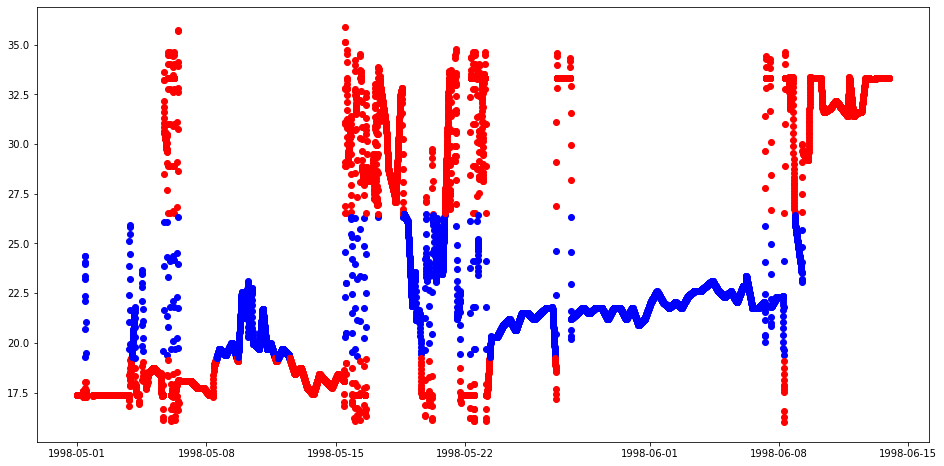

In [ ]:
plt.figure(figsize=(16,8))

lower_val = savgol_df['BFP_SEAL_WATER_FLOW'].quantile(0.25)

upper_val = savgol_df['BFP_SEAL_WATER_FLOW'].quantile(0.75)

for i in range(0, len(savgol_df)):
 
    if savgol_df['BFP_SEAL_WATER_FLOW'][i] <=  upper_val and savgol_df['BFP_SEAL_WATER_FLOW'][i] >= lower_val:
       plt.scatter(savgol_df.index[i], savgol_df['BFP_SEAL_WATER_FLOW'][i], c = 'B')
       #sns.scatterplot(x = dataset1scatter.index, y = dataset1scatter['BFP_SEAL_WATER_FLOW'][i], palette = ['green'])
    else:
       #sns.scatterplot(x = dataset1scatter.index, y = dataset1scatter['BFP_SEAL_WATER_FLOW'][i], palette = ['red'])
      plt.scatter(savgol_df.index[i], savgol_df['BFP_SEAL_WATER_FLOW'][i], c = 'R')

plt.show()

The goal of the Hampel filter is to identify and replace outliers in a given series. It uses a sliding window of configurable width to go over the data. For each window (given observation and the 2 window_size surrounding elements, window_size for each side)

URL: https://towardsdatascience.com/outlier-detection-with-hampel-filter-85ddf523c73d

In [ ]:
def hampel(vals_orig, k=12, t0=3):
    '''
    vals: pandas series of values from which to remove outliers
    k: size of window (including the sample; 7 is equal to 3 on either side of value)
    '''
    #Make copy so original not edited
    vals = vals_orig.copy()    
    #Hampel Filter
    L = 1.4826
    rolling_median= vals.rolling(k).median()
    difference=np.abs(rolling_median-vals)
    median_abs_deviation = difference.rolling(k).median()
    threshold= t0 *L * median_abs_deviation
    outlier_idx=difference>threshold
    vals[outlier_idx] = np.nan
    return(vals)

In [ ]:
data_hampel = hampel(dataset1scatter['BFP_SEAL_WATER_FLOW'], 12, 3)

hampel_df = pd.Series.to_frame(data_hampel)

hampel_df.columns = dataset1scatter.columns

hampel_df.index = dataset1scatter.index

In [ ]:
plt.figure(figsize = (16,8))

bp = sns.boxplot(dataset1scatter['BFP_SEAL_WATER_FLOW'])

Plotting the graph for hampel.

<Figure size 1152x576 with 0 Axes>

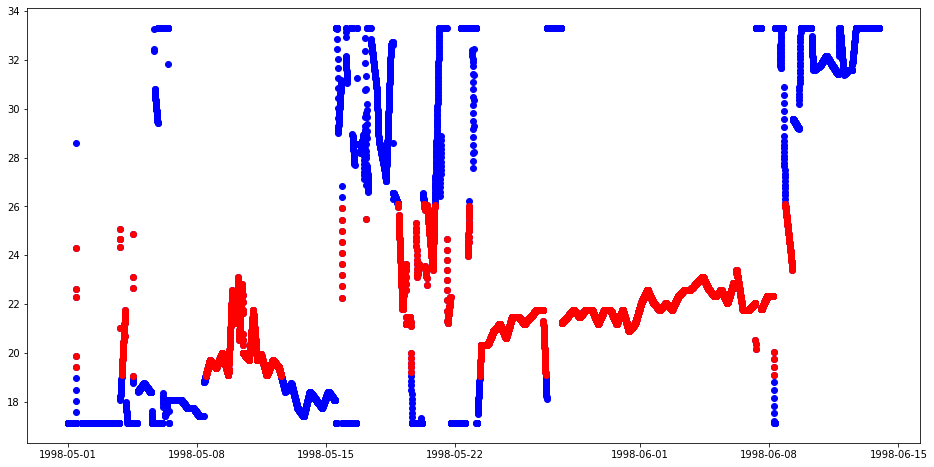

In [ ]:
plt.figure(figsize=(16,8))

lower_val = hampel_df['BFP_SEAL_WATER_FLOW'].quantile(0.25)

upper_val = hampel_df['BFP_SEAL_WATER_FLOW'].quantile(0.75)

plt.figure(figsize = (16,8))

plt.scatter(hampel_df.index, hampel_df['BFP_SEAL_WATER_FLOW'], c = 'B')

for i in range(0, len(hampel_df)):
 
    if (hampel_df['BFP_SEAL_WATER_FLOW'][i] <=  upper_val and hampel_df['BFP_SEAL_WATER_FLOW'][i] >= lower_val):
        plt.scatter(hampel_df.index[i], hampel_df['BFP_SEAL_WATER_FLOW'][i], c = 'R')
        
plt.show()

Imputation Techniques Forward Fill, Backward Fill, KNN Imputation, MICE and Interpolation

In [ ]:
def forward_fill(df_obj):

  df_obj = df_obj.ffill()

  return df_obj

def fill_0(df_obj):

  df_obj = df_obj.fillna(0)
  
  return df_obj

def backward_fill(df_obj):

  df_obj = df_obj.bfill()

  return df_obj

def knn_imputation(df_obj):

   dfobj = np.array(df_obj)

   print(type(dfobj))

   from sklearn.impute import KNNImputer 
   imputer = KNNImputer(n_neighbors = 3, weights="uniform")
   dataset1 = imputer.fit_transform(dfobj.reshape(-1,1))
  
   return list(dataset1)

def mice_imputation(df_obj):

  from statsmodels.imputation.mice import MICEData

  imp = MICEData(df_obj)

  return type(imp)

def interpol(df_obj):

  df_obj = df_obj.interpolate(method='spline', order = 3)

  return df_obj

def interpol_cubic(df_obj):

  df_obj = df_obj.interpolate(method='akima')

  return df_obj

def mean_impute(df_obj):

  mean = df_obj['BFP_SEAL_WATER_FLOW'].mean()

  df_obj.fillna(mean, inplace = True)

  return df_obj

def median_impute(df_obj):

  median = df_obj['BFP_SEAL_WATER_FLOW'].median()

  df_obj.fillna(median, inplace = True)

  return df_obj


Computation of Imputation Errors.

Over here KNN has the least mean squared error of all the methods for 5000 value imputation


Mean Squared Errors: (186.22, 14.07, 10.27, 9.57, 18.98, 25.41)

In [ ]:
from sklearn.metrics import mean_squared_error

non_imputed_col = pd.read_csv('Imputer.csv')

nan_introduced = pd.read_csv('Nan_data.csv')

error_array = []

error0 = np.round(mean_squared_error(non_imputed_col['BFP_SEAL_WATER_FLOW'], fill_0(nan_introduced['BFP_SEAL_WATER_FLOW'])), 2)

error1 = np.round(mean_squared_error(non_imputed_col['BFP_SEAL_WATER_FLOW'], forward_fill(nan_introduced['BFP_SEAL_WATER_FLOW'])), 2)

error2 = np.round(mean_squared_error(non_imputed_col['BFP_SEAL_WATER_FLOW'], backward_fill(nan_introduced['BFP_SEAL_WATER_FLOW'])), 2)

error3 = np.round(mean_squared_error(non_imputed_col['BFP_SEAL_WATER_FLOW'], knn_imputation(nan_introduced['BFP_SEAL_WATER_FLOW'])), 2)

error4 = np.round(mean_squared_error(non_imputed_col['BFP_SEAL_WATER_FLOW'], interpol(nan_introduced['BFP_SEAL_WATER_FLOW'])), 2)

error5 = np.round(mean_squared_error(non_imputed_col['BFP_SEAL_WATER_FLOW'], interpol_cubic(nan_introduced['BFP_SEAL_WATER_FLOW'])), 2)


error_array.append((error0, error1, error2, error3, error4, error5))

print(error_array[0])